In [19]:
import torch
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pyautogui


In [2]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

YOLOv5  v7.0-448-gdeec5e45 Python-3.9.25 torch-2.8.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

results = model(img)
results.print()

plt.imshow(np.squeeze(results.render()))
plt.show()

C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 3502.2ms pre-process, 97.5ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
results.render()

In [ ]:
results.crop()

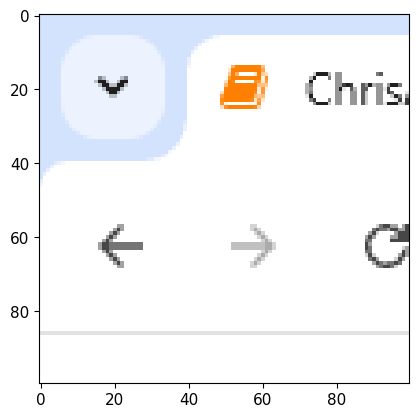

In [21]:
res = pyautogui.screenshot()
plt.imshow(np.array(res)[:100, :100])

In [ ]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

In [3]:
import uuid
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images')
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 100

In [ ]:
for img_num in range(number_imgs):
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
    

In [29]:
cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

[WinError 3] O sistema não pode encontrar o caminho especificado: 'labelImg && pyrcc5 -o libs/resources.py resources.qrc'
C:\Users\souza\projects\chris-ai-game-object-detection


In [30]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [33]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=hyp.scratch.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
   deec5e45..0d25ae7c  master     -> origin/master
 * [new branch]        dependabot/pip/utils/google_app_engine/pip-d07876404d -> origin/dependabot/pip/utils/google_app_engine/pip-d07876404d
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralyt

In [7]:
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp/weights/best.pt')

YOLOv5  v7.0-448-gdeec5e45 Python-3.9.25 torch-2.8.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [13]:
img = os.path.join('data', 'images', 'a7b63bca-c98d-11f0-817f-005056c00008.jpg')

In [23]:
model.conf = 0.25
model.iou = 0.35
results = model(img)

C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [15]:
results.print()

image 1/1: 481x640 1 game_over
Speed: 14.0ms pre-process, 98.0ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)


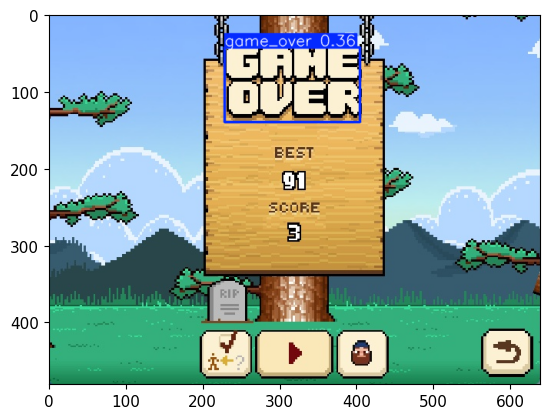

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [24]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\souza\projects\chris-ai-game-object-det